In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import LombScargle
from glob import glob
import pandas as pd
# from pandas import DataFrame

In [2]:
#files = glob('11stars/*.fits')
files = glob('/Users/samquist/Documents/AstroData/Fits_Files/229200000.nosync/*/*.fits')

In [3]:


def curvefunc(file, savefig=False):
    
    
    hdu = fits.open(file)
    data = hdu[1].data
    ok = np.where((data['QUALITY'] == 0) & (data['FCOR'] > 0))
    if len(ok[0]) > 0:
    
        #Plotting the Light Curve
        plt.figure(figsize=(7,9))
        plt.subplot(3,1,1)
        plt.scatter(data['TIME'][ok], data['FCOR'][ok], s = 5, alpha = 0.5)
        plt.xlabel('Days')
        plt.ylabel('Flux')


        #Plotting the Power of the periodogram
        LS = LombScargle(data['TIME'][ok], data['FCOR'][ok])
        frequency, power = LS.autopower(minimum_frequency=1./40., maximum_frequency=1./.1)
        plt.subplot(3,1,2)
        plt.plot(1/frequency, power)
        plt.xscale('log')
        plt.xlabel('Period (Days)')
        plt.ylabel('LS Power')

        best_frequency = frequency[np.argmax(power)]

        periodd = 1/best_frequency
        if best_frequency ==0:
            periodd ==0
        else:
            periodd = 1/best_frequency


        #Plotting the line fit over all phased curves
        phase_fit = np.linspace(0, 1)
        y_fit = LombScargle(data['TIME'][ok], data['FCOR'][ok]).model(t=phase_fit / best_frequency,
                                            frequency=best_frequency)
        phase = (data['TIME'][ok] * best_frequency) % 1
        
        plt.subplot(3,1,3)
        plt.errorbar(phase, data['FCOR'][ok],yerr= data['FRAW_ERR'][ok], 
                fmt='o', mew=0, capsize=0, elinewidth=1.5, alpha = .175)
        plt.plot(phase_fit, y_fit, color='r')
#         plt.gca().invert_yaxis()
        plt.xlabel('Phase ({0:f})'.format(1/best_frequency))
        plt.ylabel('Flux')
        
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.4)
    
        if savefig:
            plt.savefig('/Users/samquist/Documents/AstroData/Figures/' + file[36:-5]+ '.png')
        
        plt.close()
        


   

        hdu.close()
    else:
        periodd = 0
        power = [0]
    return np.nanmax(power), periodd

#curvefunc('/Users/samquist/Downloads/hlsp_everest_k2_llc_220626248-c08_kepler_v2.0_lc.fits')


In [4]:
files[0]
files[0].split('llc_')[1].split('-')[0] 

'229228690'

In [7]:
datum['epic_number']


array([ 60017806,  60017809,  60017810, ..., 251813325, 251813676,
       251813680])

In [6]:
hdus = fits.open('/Users/samquist/Documents/AstroData/k2_dr2_1arcsec.fits')
datum = hdus[1].data
datum['epic_number'][datum['k2_campaign_str']== '8'].max()
#datum.columns
#for i in range(len(files)):
    
    #print(np.where((int(files[i].split('llc_')[1].split('-')[0]) == datum['epic_number']))[0])

220750649

In [10]:
pwr = np.zeros(len(files))
per = np.zeros(len(files))
for k in range(len(files)):
    pwr_k, per_k = curvefunc(files[k], savefig=False)
    pwr[k] = pwr_k
    per[k] = per_k

df = pd.DataFrame(data = {'Object': files, 
                          'Maximum_Power' : pwr, 
                          'Period' : per})
df.to_csv(r'/Users/samquist/Documents/AstroData/biggerstardataframe.csv')


In [87]:
#Write paper describing what your did, pick best plot to talk about by finals week
#Match stars with Gaia/kepler color file
    #Columns are: bp_rp (gaia color)
    
    #So make graphs of gaia color (xaxis) vs kepler pwr (yaxis)

622

<Container object of 20 artists>

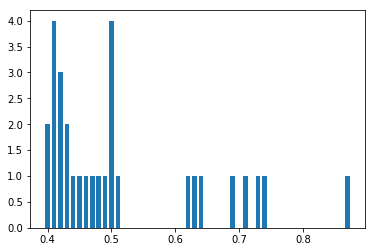

In [121]:
wpwr =  np.where(tpwr >=.4)
indicies = [wpwr]
goodvalues = np.take(tpwr, wpwr)
xvalues = [
    .40,
    .41,
    .42,
    .43,
    .44,
    .45,
    .46,
    .47,
    .48,
    .49,
    .50,
    .51,
    .62,
    .63,
    .64,
    .69,
    .71,
    .73,
    .74,
    .87,    

]
 
noval = [
    2,
    4,
    3,
    2,
    1,
    1,
    1,
    1,
    1,
    1,
    4,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
      
]
plt.bar(xvalues, noval, width = .007)



Text(0,0.5,'Number')

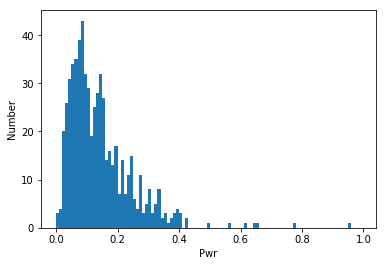

In [153]:
plt.hist(pwr, bins=np.arange(0, 1, 0.01))
plt.xlabel('Pwr')
plt.ylabel('Number')